In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [17]:
dataFile = r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\new dataset\cellinfo_signals_v3.csv'

In [18]:
myData=pd.read_csv(dataFile)

In [19]:
myData['day']=[f"d{x.split('_')[0]}" for x in myData.file]
myData = myData.astype({"day": 'object'})
set(myData['day'])

{'d20191203'}

In [20]:
for i, cell in myData.iterrows():
    myData.at[i,'decon']="d" in myData.loc[i,'file']


In [21]:
myData

Unnamed: 0                         file original cell name  \
0             0         20191203_cell-00.czi     20191125-01-17   
1             1         20191203_cell-01.czi     20191125-01-20   
2             2         20191203_cell-02.czi     20191125-01-23   
3             3         20191203_cell-03.czi     20191125-01-25   
4             4         20191203_cell-04.czi     20191125-01-32   
5             5         20191203_cell-05.czi     20191125-01-36   
6             6         20191203_cell-06.czi     20191125-01-37   
7             7         20191203_cell-07.czi     20191125-01-40   
8             8         20191203_cell-08.czi     20191125-01-41   
9             9         20191203_cell-09.czi     20191125-01-45   
10           10         20191203_cell-10.czi     20191125-01-52   
11           11         20191203_cell-11.czi     20191125-01-54   
12           12         20191203_cell-12.czi     20191125-01-57   
13           13         20191203_cell-13.czi     20191125-01-59   
14           14         20191203_cell-14.czi     20191125-01-65   
15           15         20191203_cell-15.czi     20191125-01-66   
16           16         20191203_cell-16.czi     20191125-01-68   
17           17         20191203_cell-17.czi     20191125-01-69   
18           18         20191203_cell-18.czi     20191125-01-71   
19           19         20191203_cell-19.czi     20191125-01-79   
20           20         20191203_cell-20.czi     20191125-01-81   
21           21         20191203_cell-21.czi     20191125-01-86   
22           22         20191203_cell-23.czi     20191125-01-87   
23           23         20191203_cell-24.czi     20191125-01-93   
24           24         20191203_cell-25.czi     20191125-01-99   
25           25         20191203_cell-26.czi    20191125-01-101   
26           26         20191203_cell-27.czi    20191125-01-102   
27           27         20191203_cell-28.czi    20191125-01-106   
28           28         20191203_cell-29.czi    20191125-01-108   
29           29        20191203_cell-30.tiff     20191125-01-10   
..          ...                          ...                ...   
294         294  20191203_cellde-140.czi.ims    20191125-11-144   
295         295  20191203_cellde-141.czi.ims    20191125-11-145   
296         296  20191203_cellde-142.czi.ims     20191125-12-17   
297         297  20191203_cellde-143.czi.ims     20191125-12-18   
298         298  20191203_cellde-144.czi.ims     20191125-12-33   
299         299  20191203_cellde-145.czi.ims     20191125-12-39   
300         300  20191203_cellde-146.czi.ims     20191125-12-46   
301         301  20191203_cellde-147.czi.ims     20191125-12-74   
302         302  20191203_cellde-148.czi.ims     20191125-12-84   
303         303  20191203_cellde-149.czi.ims    20191125-12-136   
304         304  20191203_cellde-150.czi.ims     20191125-16-64   
305         305  20191203_cellde-151.czi.ims     20191125-16-17   
306         306  20191203_cellde-152.czi.ims     20191125-16-18   
307         307  20191203_cellde-153.czi.ims     20191125-16-20   
308         308  20191203_cellde-154.czi.ims     20191125-16-28   
309         309  20191203_cellde-155.czi.ims     20191125-16-35   
310         310  20191203_cellde-156.czi.ims     20191125-16-41   
311         311  20191203_cellde-157.czi.ims     20191125-16-42   
312         312  20191203_cellde-158.czi.ims     20191125-16-48   
313         313  20191203_cellde-159.czi.ims     20191125-16-53   
314         314  20191203_cellde-160.czi.ims     20191125-16-56   
315         315  20191203_cellde-161.czi.ims  20191125-16-64(H)   
316         316  20191203_cellde-162.czi.ims  20191125-16-18(H)   
317         317  20191203_cellde-163.czi.ims  20191125-16-28(H)   
318         318  20191203_cellde-164.czi.ims  20191125-16-35(H)   
319         319  20191203_cellde-165.czi.ims  20191125-16-41(H)   
320         320  20191203_cellde-166.czi.ims  20191125-16-42(H)   
321         321  20191203_cellde-167.czi.ims  201911

In [21]:
myDataSel=myData.loc[((myData.decon==True) & (myData['ab2 (heterochromatin)']=='HP1beta')),:].copy()

In [22]:
myDataSel["euchro_20perc_ch2"]=myDataSel.nucleus_Otsu_ch2 - myDataSel.hetChrom_20perc_ch2

In [23]:
myDataSel["euchro_20perc_ch3"]=myDataSel.nucleus_Otsu_ch3 - myDataSel.hetChrom_20perc_ch3

In [24]:
myDataSelnd=myData.loc[((myData.decon==False) & (myData['ab2 (heterochromatin)']=='HP1beta')),:].copy()

In [25]:
myDataSelnd["euchro_20perc_ch2"]=myDataSelnd.nucleus_Otsu_ch2 - myDataSelnd.hetChrom_20perc_ch2

In [26]:
myDataSelnd["euchro_20perc_ch3"]=myDataSelnd.nucleus_Otsu_ch3 - myDataSelnd.hetChrom_20perc_ch3

# for new dataset: channels are
## ch1: MCM
## ch2: hetChrom(HP1Beta)
## ch3: DAPI

<IPython.core.display.Javascript object>


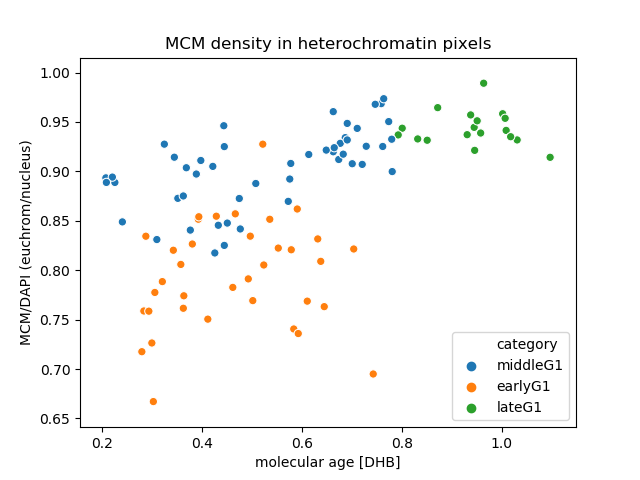

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [27]:
%matplotlib notebook

myDataSel['temp']=(myDataSel.hetChrom_20perc_ch2/myDataSel.nucleus_Otsu_ch2)/(myDataSel.hetChrom_20perc_ch3/myDataSel.nucleus_Otsu_ch3)
sn.scatterplot(x='molecular age ', y = 'temp', data=myDataSel.loc[('G1' in x for x in myDataSel.category),:], hue='category')
plt.ylabel("MCM/DAPI (euchrom/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

# erosion analysis

## inner (9x9 with 5 iterations)

<IPython.core.display.Javascript object>


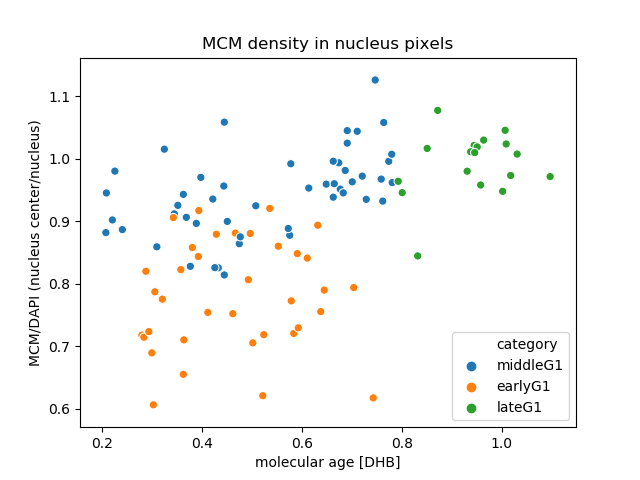

Text(0.5, 1.0, 'MCM density in nucleus pixels')

In [28]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3)
center=(myDataSel.nucleus_Otsu_erosion_inner_9x5_ch2/myDataSel.nucleus_Otsu_erosion_inner_9x5_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecular age ', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (nucleus center/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in nucleus pixels")

<IPython.core.display.Javascript object>


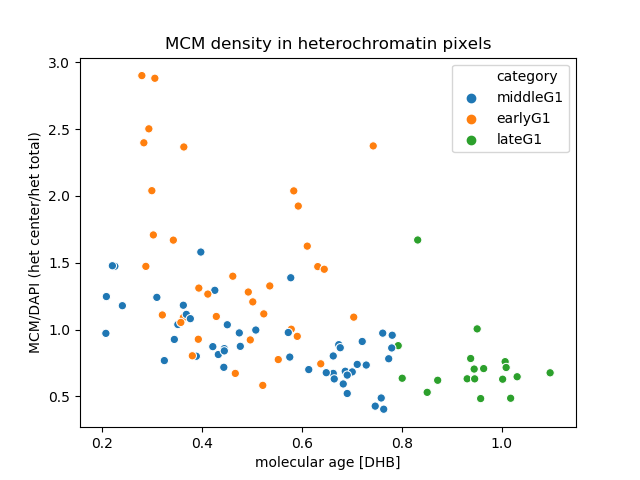

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [31]:
%matplotlib notebook

total= (myDataSel.hetChrom_20perc_ch2/myDataSel.hetChrom_20perc_ch3)
center=(myDataSel.HetChrom_erosion_inner_9x5_20_ch2/myDataSel.HetChrom_erosion_inner_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecular age ', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (het center/het total)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


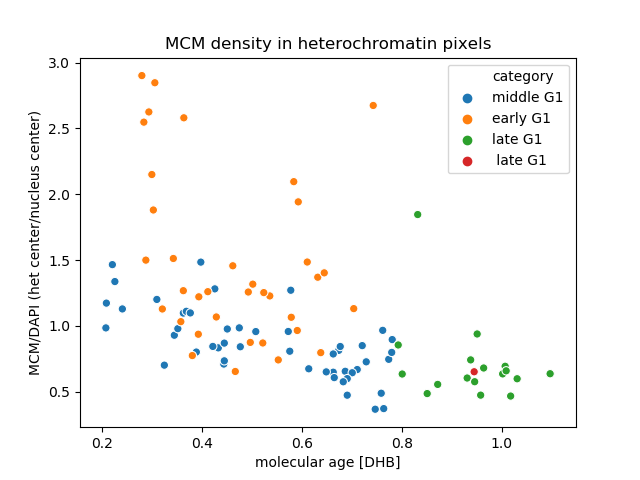

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [31]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_erosion_inner_9x5_ch2/myDataSel.nucleus_Otsu_erosion_inner_9x5_ch3)
center=(myDataSel.HetChrom_erosion_inner_9x5_20_ch2/myDataSel.HetChrom_erosion_inner_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecular age ', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (het center/nucleus center)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


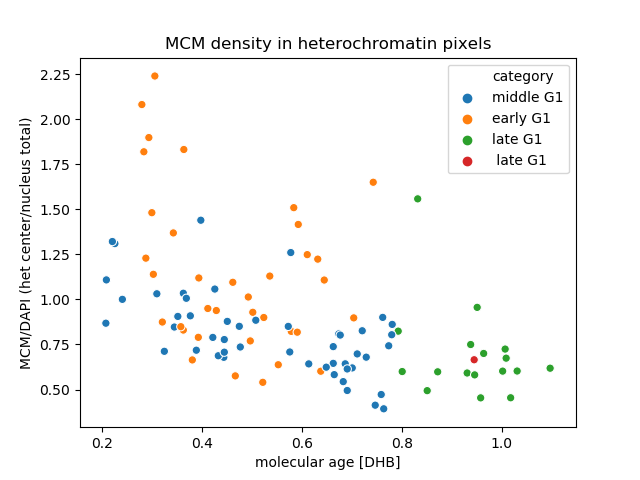

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [32]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3)
center=(myDataSel.HetChrom_erosion_inner_9x5_20_ch2/myDataSel.HetChrom_erosion_inner_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecular age ', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (het center/nucleus total)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

# outer (9x9 with 5 iterations)

<IPython.core.display.Javascript object>


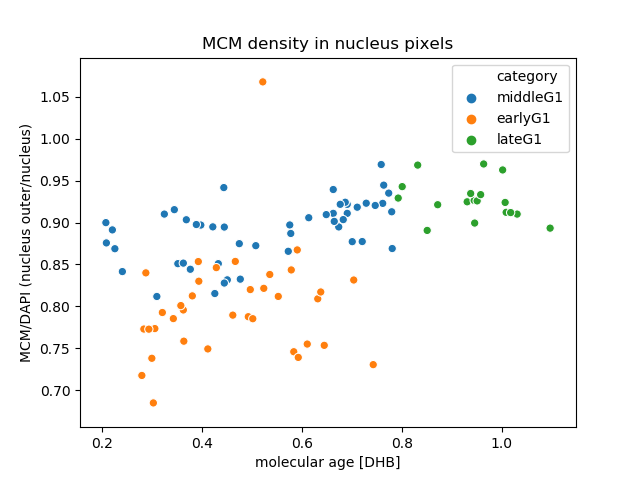

Text(0.5, 1.0, 'MCM density in nucleus pixels')

In [29]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3)
center=(myDataSel.nucleus_Otsu__erosion_outer_9x5_ch2/myDataSel.nucleus_Otsu__erosion_outer_9x5_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecular age ', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (nucleus outer/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in nucleus pixels")

<IPython.core.display.Javascript object>


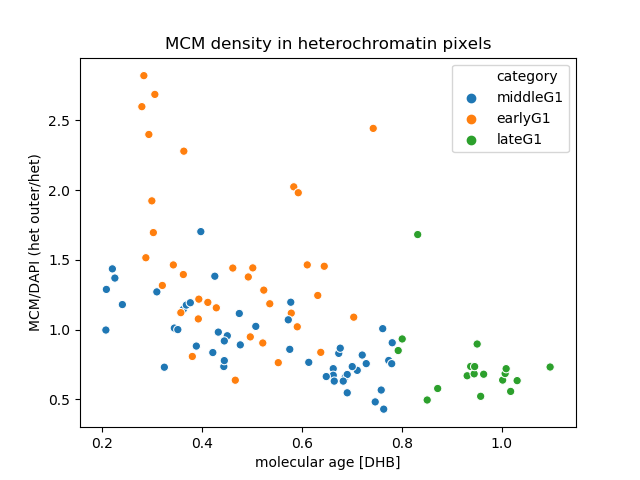

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [30]:
%matplotlib notebook

total= (myDataSel.hetChrom_20perc_ch2/myDataSel.hetChrom_20perc_ch3)
center=(myDataSel.HetChrom_erosion_outer_9x5_20_ch2/myDataSel.HetChrom_erosion_outer_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecular age ', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (het outer/het)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


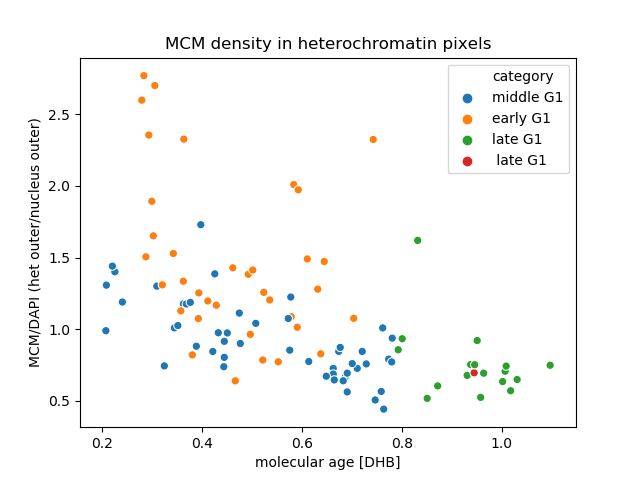

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [35]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu__erosion_outer_9x5_ch2/myDataSel.nucleus_Otsu__erosion_outer_9x5_ch3)
center=(myDataSel.HetChrom_erosion_outer_9x5_20_ch2/myDataSel.HetChrom_erosion_outer_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecular age ', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (het outer/nucleus outer)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


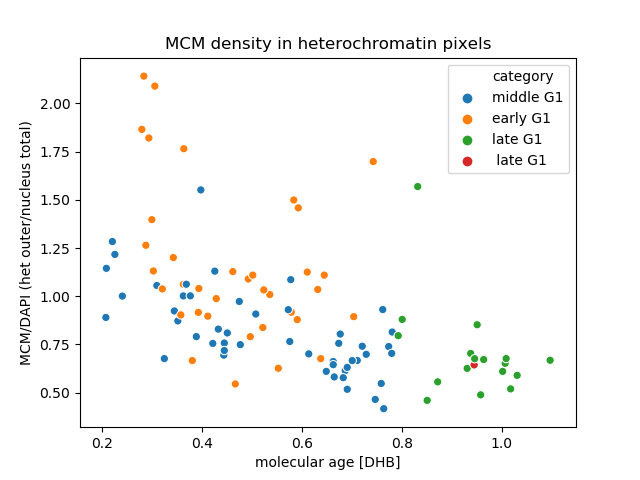

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [36]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3)
center=(myDataSel.HetChrom_erosion_outer_9x5_20_ch2/myDataSel.HetChrom_erosion_outer_9x5_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecular age ', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (het outer/nucleus total)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

# inner (13 x 13 with 8 iterations)

<IPython.core.display.Javascript object>


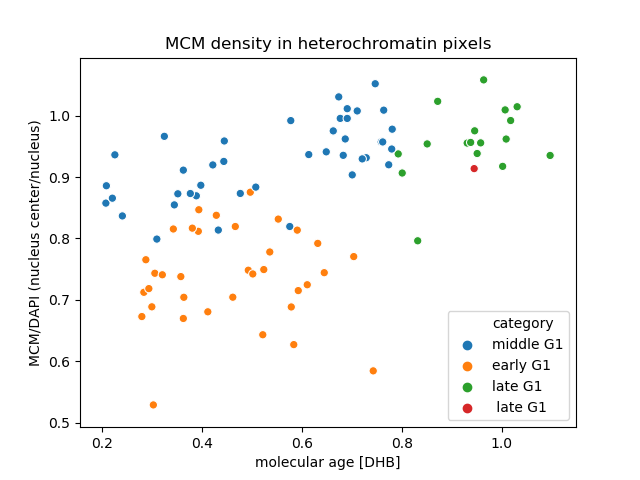

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [37]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3)
center=(myDataSel.nucleus_Otsu_erosion_inner_13x8_ch2/myDataSel.nucleus_Otsu_erosion_inner_13x8_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecular age ', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (nucleus center/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


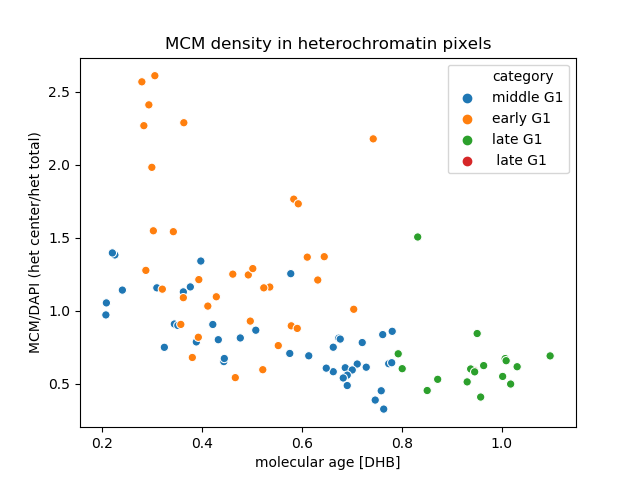

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [38]:
%matplotlib notebook

total= (myDataSel.hetChrom_20perc_ch2/myDataSel.hetChrom_20perc_ch3)
center=(myDataSel.HetChrom_erosion_inner_13x8_20_ch2/myDataSel.HetChrom_erosion_inner_13x8_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecular age ', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (het center/het total)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


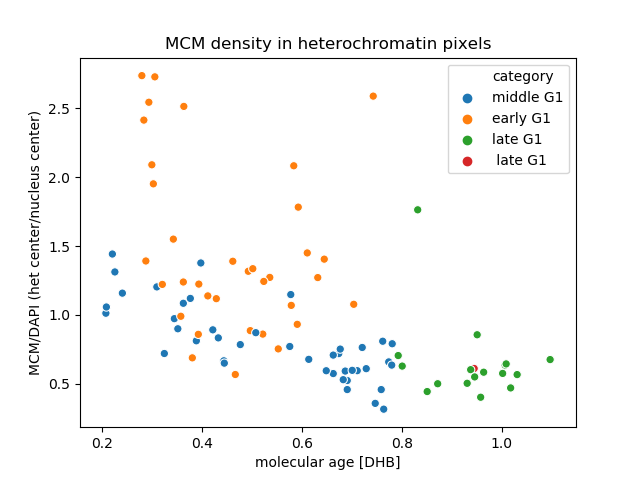

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [39]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_erosion_inner_13x8_ch2/myDataSel.nucleus_Otsu_erosion_inner_13x8_ch3)
center=(myDataSel.HetChrom_erosion_inner_13x8_20_ch2/myDataSel.HetChrom_erosion_inner_13x8_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecular age ', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (het center/nucleus center)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


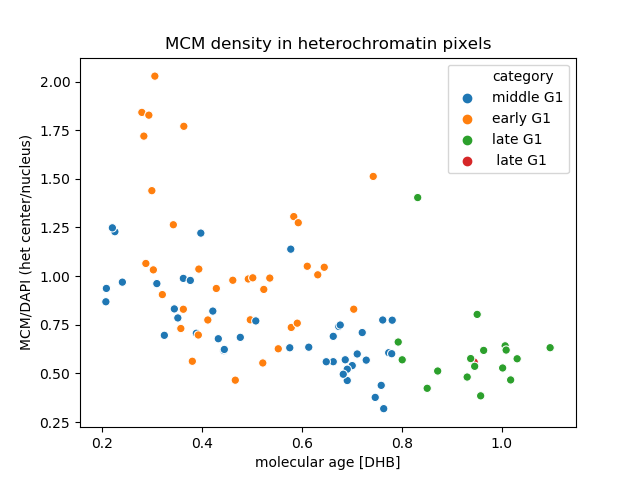

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [40]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3)
center=(myDataSel.HetChrom_erosion_inner_13x8_20_ch2/myDataSel.HetChrom_erosion_inner_13x8_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecular age ', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (het center/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

# outer (13x13 with 8 iterations)

<IPython.core.display.Javascript object>


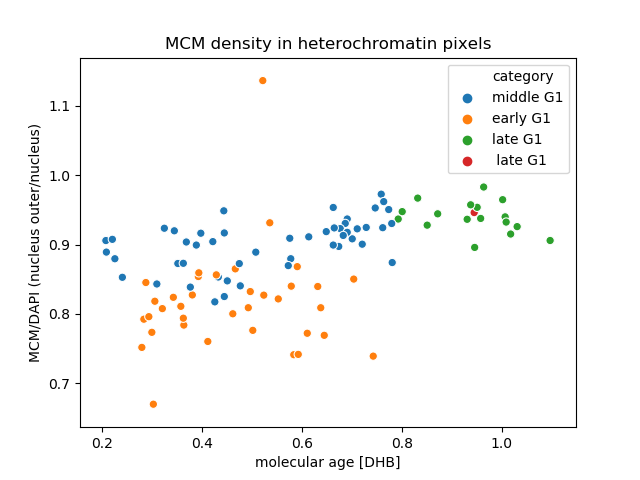

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [41]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3)
center=(myDataSel.nucleus_Otsu__erosion_outer_13x8_ch2/myDataSel.nucleus_Otsu__erosion_outer_13x8_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecular age ', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (nucleus outer/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


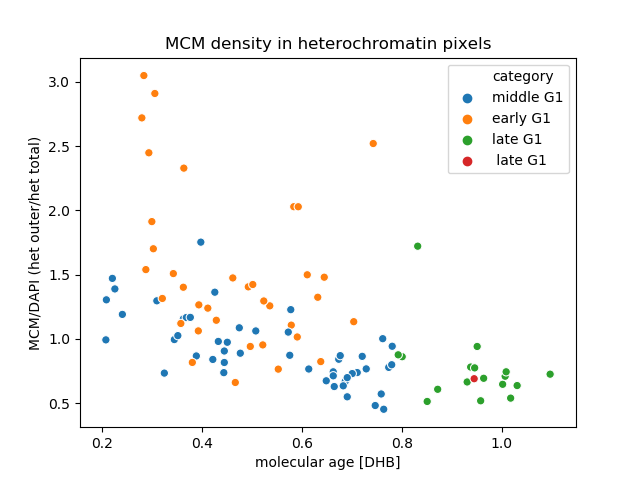

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [42]:
%matplotlib notebook

total= (myDataSel.hetChrom_20perc_ch2/myDataSel.hetChrom_20perc_ch3)
center=(myDataSel.HetChrom_erosion_outer_13x8_20_ch2/myDataSel.HetChrom_erosion_outer_13x8_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecular age ', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (het outer/het total)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


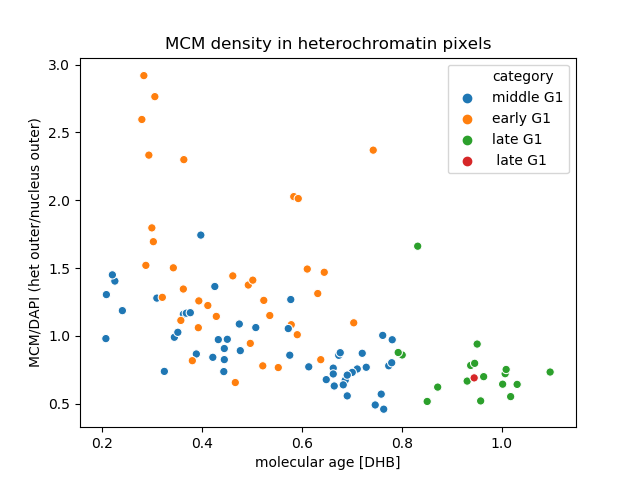

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [43]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu__erosion_outer_13x8_ch2/myDataSel.nucleus_Otsu__erosion_outer_13x8_ch3)
center=(myDataSel.HetChrom_erosion_outer_13x8_20_ch2/myDataSel.HetChrom_erosion_outer_13x8_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecular age ', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (het outer/nucleus outer)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


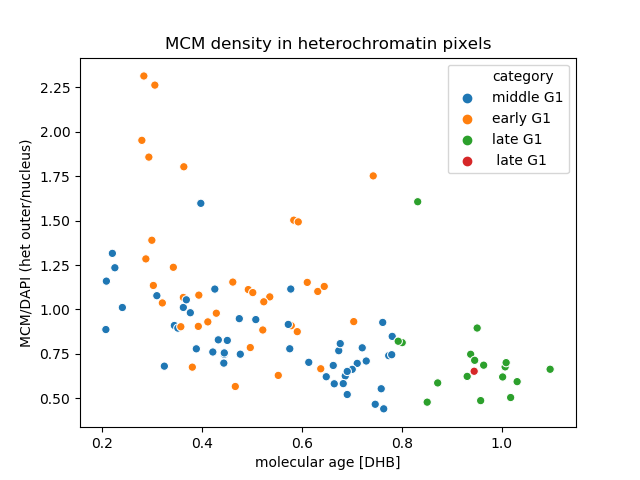

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [44]:
%matplotlib notebook

total= (myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3)
center=(myDataSel.HetChrom_erosion_outer_13x8_20_ch2/myDataSel.HetChrom_erosion_outer_13x8_20_ch3)

myDataSel['temp']= center/total

sn.scatterplot(x='molecular age ', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (het outer/nucleus)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


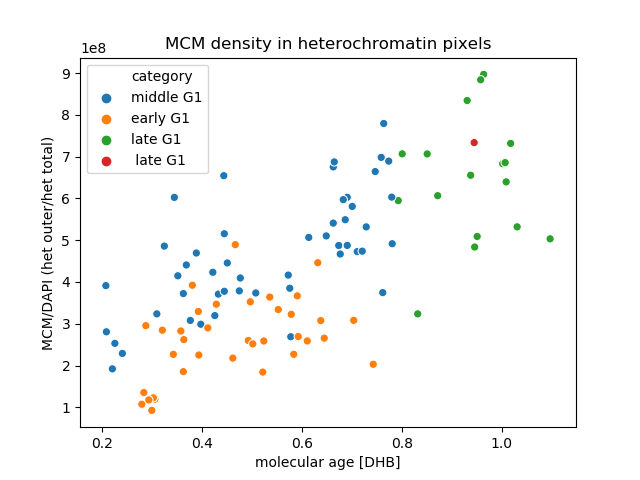

Text(0.5, 1.0, 'MCM density in heterochromatin pixels')

In [45]:
%matplotlib notebook

total= myDataSel.hetChrom_20perc_ch2
center= myDataSel.HetChrom_erosion_outer_13x8_20_ch2

myDataSel['temp']= total

sn.scatterplot(x='molecular age ', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (het outer/het total)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")

<IPython.core.display.Javascript object>


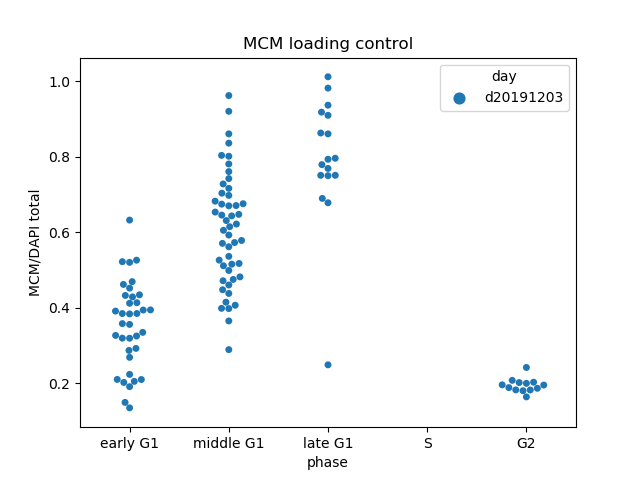

Text(0.5, 1.0, 'MCM loading control')

In [15]:
%matplotlib notebook

myDataSel['temp']=myDataSel.nucleus_Otsu_ch2/myDataSel.nucleus_Otsu_ch3
sn.swarmplot(x='category', y = 'temp', data=myDataSel,
             order=[ "early G1", "middle G1", "late G1","S","G2"],hue='day')

plt.ylabel("MCM/DAPI total")
plt.xlabel("phase")
plt.title("MCM loading control")

<IPython.core.display.Javascript object>


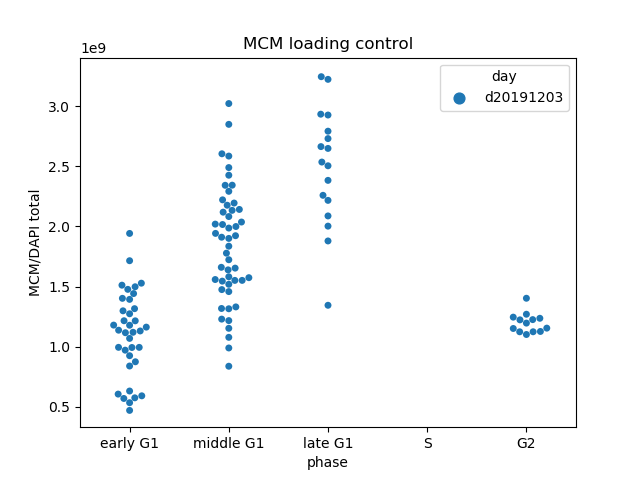

Text(0.5, 1.0, 'MCM loading control')

In [16]:
%matplotlib notebook

myDataSel['temp']=myDataSel.nucleus_Otsu_ch2
sn.swarmplot(x='category', y = 'temp', data=myDataSel,
             order=[ "early G1", "middle G1", "late G1","S","G2"],hue='day')

plt.ylabel("MCM/DAPI total")
plt.xlabel("phase")
plt.title("MCM loading control")

In [48]:
mod=0.3

myDataSel['mol_age_mod']=myDataSel['molecular age ']
myDataSel.loc[((myDataSel.age_track<1.5) & (myDataSel.category=='earlyG1')),'mol_age_mod']=mod

AttributeError: 'DataFrame' object has no attribute 'age_track'

In [ ]:
%matplotlib notebook

total= myDataSel.hetChrom_20perc_ch2

myDataSel['temp']= total

sn.scatterplot(x='mol_age_mod', y = 'temp', data=myDataSel.loc[['G1' in x for x in myDataSel.category],:],hue='category')
plt.ylabel("MCM/DAPI (het outer/het total)")
plt.xlabel("molecular age [DHB]")
plt.title("MCM density in heterochromatin pixels")